In [1]:
import numpy as np

from qiskit import Aer, QuantumCircuit,BasicAer, execute
from qiskit.visualization import plot_histogram
from IPython.display import display, Math, Latex

%matplotlib inline

from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector

### I.i) Let us start  by performing a bit flip. The goal is to reach the state $\vert1\rangle$ starting from state $\vert0\rangle$. <img src="state1.png" width="300"> 


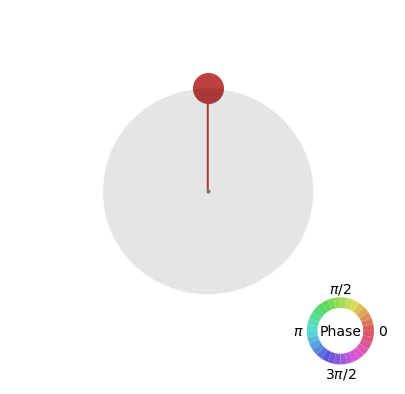

In [29]:
qc1 = QuantumCircuit(1)
backend = BasicAer.get_backend('statevector_simulator')
job1 = execute(qc1, backend).result()
plot_state_qsphere(job1.get_statevector(qc1))
#show_state_labels=True, show_state_angles=True

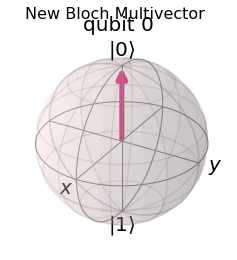

In [3]:
plot_bloch_multivector(job1.get_statevector(qc1), title="New Bloch Multivector")

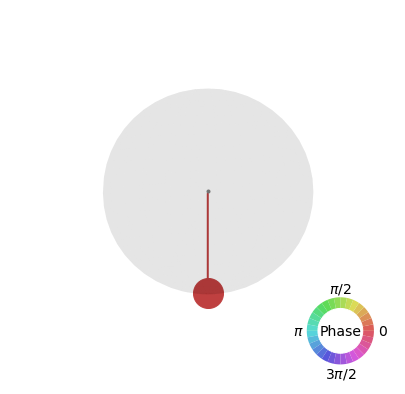

In [4]:
qc1.x(0)
job1 = execute(qc1, backend).result()
plot_state_qsphere(job1.get_statevector(qc1))

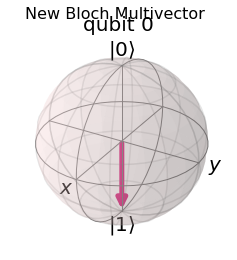

In [5]:
plot_bloch_multivector(job1.get_statevector(qc1), title="New Bloch Multivector")

### I.ii) Next, let's create a superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. <img src="stateplus.png" width="300"> 


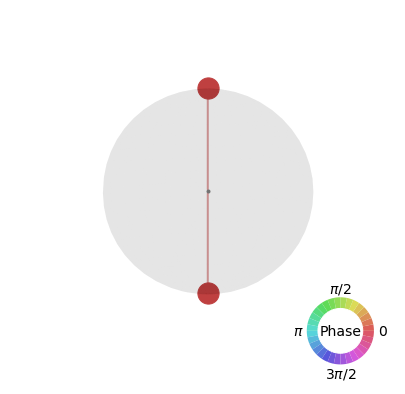

In [6]:
qc2=QuantumCircuit(1)
qc2.h(0)
job2 = execute(qc2, backend).result()
plot_state_qsphere(job2.get_statevector(qc2))

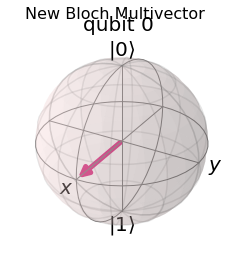

In [7]:
plot_bloch_multivector(job2.get_statevector(qc2), title="New Bloch Multivector")

### I.iii) Let's combine those two. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. <img src="stateminus.png" width="300"> 
Can you combine the above two tasks to come up with the solution?

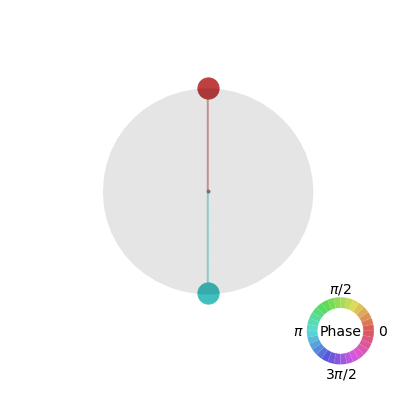

In [8]:
qc3=QuantumCircuit(1)
qc3.h(0)
qc3.y(0)
job3 = execute(qc3, backend).result()
plot_state_qsphere(job3.get_statevector(qc3))

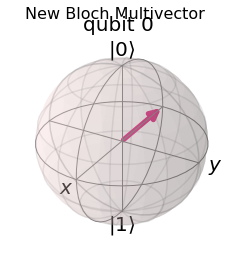

In [9]:
plot_bloch_multivector(job3.get_statevector(qc3), title="New Bloch Multivector")

### I.iv) Finally, we move on to the complex numbers. The goal is to reach the state $|\circlearrowleft\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$. <img src="stateleft.png" width="300"> 

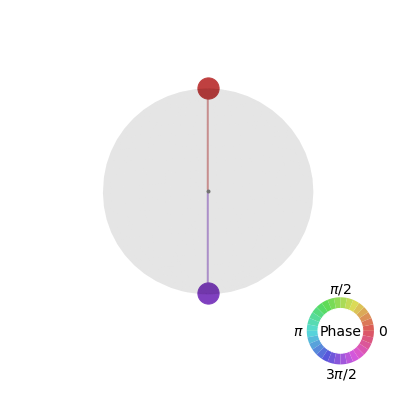

In [10]:
qc4=QuantumCircuit(1)
qc4.h(0)
qc4.sdg(0)
job4 = execute(qc4, backend).result()
plot_state_qsphere(job4.get_statevector(qc4))

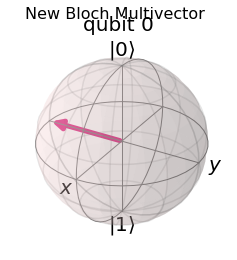

In [11]:
plot_bloch_multivector(job4.get_statevector(qc4), title="New Bloch Multivector")

### II.i) Construct the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$.  <img src="phi+.png" width="300"> 
For this state we would have probability $\frac{1}{2}$ to measure "00" and probability $\frac{1}{2}$ to measure "11". Thus, the outcomes of both qubits are perfectly correlated.

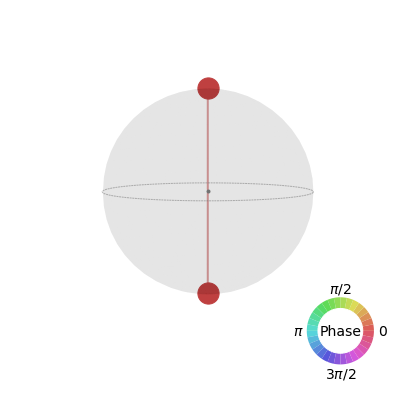

In [31]:
qc5=QuantumCircuit(2)
qc5.h(0)
qc5.cx(0,1)
job5 = execute(qc5, backend).result()
plot_state_qsphere(job5.get_statevector(qc5))


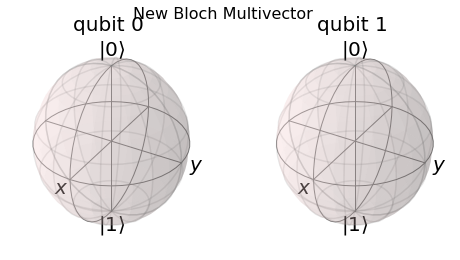

In [13]:
plot_bloch_multivector(job5.get_statevector(qc5), title="New Bloch Multivector")

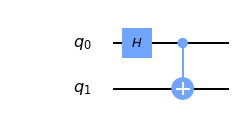

In [14]:
qc5.draw(output='mpl')

Next, try to create the state of perfectly anti-correlated qubits. Note the minus sign here, which indicates the relative phase between the two states. 
### II.ii) Construct the Bell state $\vert\Psi^-\rangle = \frac{1}{\sqrt{2}}\left(\vert01\rangle - \vert10\rangle\right)$. <img src="psi-.png" width="300"> 

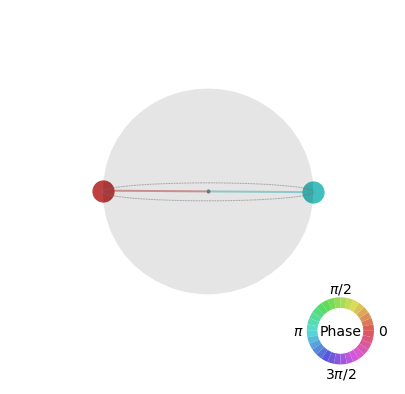

In [15]:
qc6=QuantumCircuit(2,2)
qc6.h(0)
qc6.cx(0,1)
qc6.y(1)
job6 = execute(qc6, backend).result()
plot_state_qsphere(job6.get_statevector(qc6))

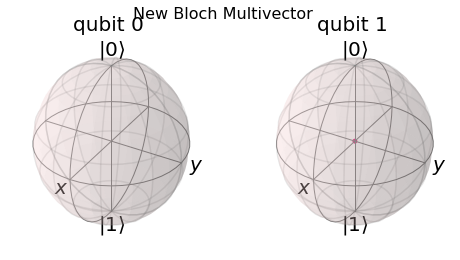

In [16]:
plot_bloch_multivector(job6.get_statevector(qc6), title="New Bloch Multivector")

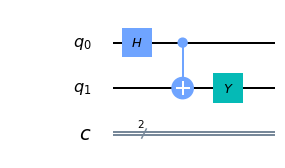

In [17]:
qc6.draw(output='mpl')

### II.iii) You are given the quantum circuit described in the function below. Swap the states of the first and the second qubit.  
This should be your final state: <img src="stateIIiii.png" width="300"> 

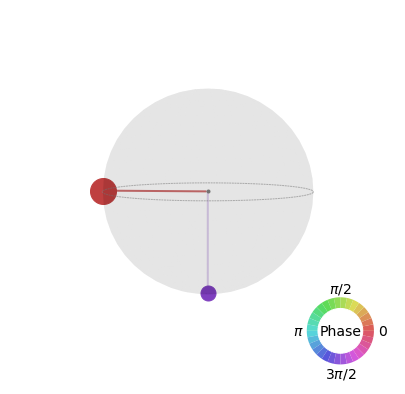

In [18]:
qc7=QuantumCircuit(2)
qc7.rx(np.pi/3,0)
qc7.x(1)
qc7.h(0)
qc7.h(0)
qc7.swap(0,1)
job7 = execute(qc7, backend).result()
plot_state_qsphere(job7.get_statevector(qc7))

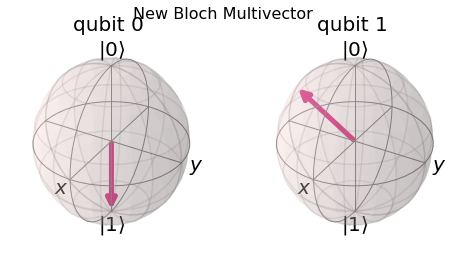

In [19]:
plot_bloch_multivector(job7.get_statevector(qc7), title="New Bloch Multivector")

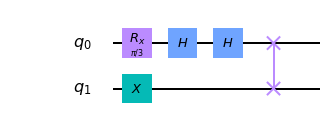

In [20]:
qc7.draw(output='mpl')

### II.iv) Write a program from scratch that creates the GHZ state (on three qubits), $\vert \text{GHZ}\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$, performs a measurement with 2000 shots, and returns the counts.  <img src="ghz.png" width="300"> 

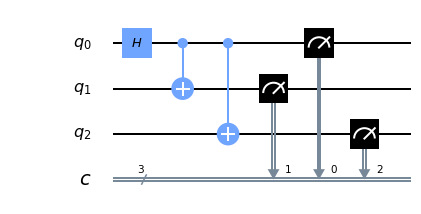

In [21]:
qc8=QuantumCircuit(3,3)
qc8.h(0)
qc8.cx(0,1)
qc8.cx(0,2)
qc8.measure(0, 0) # we perform a measurement on qubit q_0 and store the information on the classical bit c_0
qc8.measure(1, 1) # we perform a measurement on qubit q_1 and store the information on the classical bit c_1
qc8.measure(2, 2) # we perform a measurement on qubit q_2 and store the information on the classical bit c_2
#display(Math(vec_in_braket(state.data)))
qc8.draw(output='mpl') # we draw the circuit

{'111': 1048, '000': 952}


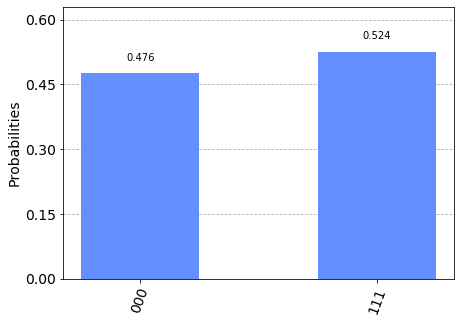

In [22]:
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
job8 = execute(qc8, backend, shots=2000).result()
counts = job8.get_counts()
print(counts)
plot_histogram(counts)

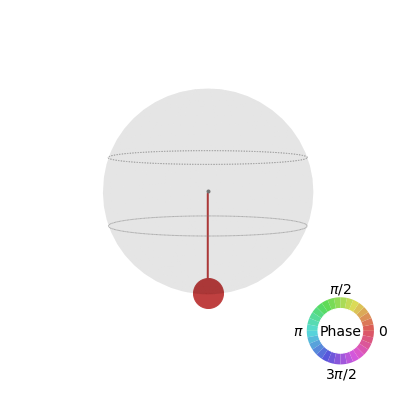

In [23]:
backend_state = Aer.get_backend('statevector_simulator') # we choose the simulator as our backend
job9 = execute(qc8, backend_state,shots=1000).result()
plot_state_qsphere(job9.get_statevector(qc8))

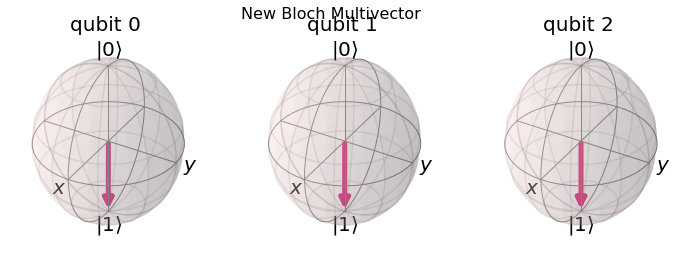

In [24]:
plot_bloch_multivector(job9.get_statevector(qc8), title="New Bloch Multivector")